In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


data = pd.read_csv("../data/processed/df_cancer_prostata_processed.csv")

In [5]:
# Creación del DataFrame
df = pd.DataFrame(data)
df=pd.DataFrame(data)

In [7]:
# Mostramos un resumen estadístico básico del dataset
print("Descripción del dataset:")
print(df.describe().T)

Descripción del dataset:
                               count          mean          std      min  \
IDPACIENTE                     870.0  27910.850575  5536.667455   1646.0   
IDTUMOR                        870.0  25382.272414  3749.857476  16920.0   
INTERVALO_INGRESO_DIAGNO       870.0   -135.877011   289.603049  -1607.0   
COD_TOPOLOGIA                  870.0     61.000000     0.000000     61.0   
SUBTIPO                        870.0      0.000000     0.000000      0.0   
DIAS_HASTA_INICIO_TRATAMIENTO  870.0    252.203448   247.576699      0.0   

                                    25%      50%       75%      max  
IDPACIENTE                     24087.50  28002.5  31985.25  37144.0  
IDTUMOR                        22280.25  25178.5  27650.75  33121.0  
INTERVALO_INGRESO_DIAGNO        -211.00   -108.0      6.75   3060.0  
COD_TOPOLOGIA                     61.00     61.0     61.00     61.0  
SUBTIPO                            0.00      0.0      0.00      0.0  
DIAS_HASTA_INICIO_TRAT

In [8]:
# Listamos todas las columnas
print("\nLista de columnas:")
columnas = df.columns.tolist()
for columna in columnas:
    print(columna)


Lista de columnas:
IDPACIENTE
IDTUMOR
SEXO
FEC_NACIMIENTO
PREVISION
RELIGION
ETNIA
ZONA_VIVIENDA
COMUNA
REGION
SSREFERENCIA
RECINTO_PROCEDE
ESTABLE_DESTINO
ACT_LABORAL
ACT_EMPRESA
SITUACION_LABORAL
ULT_CURSO_APROBADO
CANCER_PREVIO_1
CANCER_PREVIO_2
PARENTESCO_1
CANCER_PARENTESCO_1
PARENTESCO_2
CANCER_PARENTESCO_2
PARENTESCO3
CANCER_PARENTESCO3
FEC_INGRESO_CASO
FEC_DIAGNO
INTERVALO_INGRESO_DIAGNO
FEC_TOM_MUESTRA
TIPO_TUMOR
COD_TOPOLOGIA
NOM_TOPOLOGIA
COD_DET_TOPOLOGIA
NOM_DETALLE_TOPO
COD_CIE10
MORFO_COMPLETA
NOM_COMPORTAMIENTO
EXTENSION_NOM
LATERALIDAD_NOM
GRADO_DIFERENCIACION
BASE_DIAGNOSTICA
TUMOR
GRAVEDAD
POBLACION
ETAPA_CLINICA
TNM_1
SUBTIPO
ESTADO_ACTUAL
ESTADO_ACTUAL_TTO
ULTIMO_CONTACTO
ESTADO_RECH
CLASEDECASO
FUENTE1
ESTADO
INTENCION_TRATA
RESPUESTA_TRATA
TIPO_TERAPIA_1
FECHA_INICIO_TRATAMIENTO_1
FECHA_TERMINO_TRATAMIENTO_1
TIPO_TRATAMIENTO_1
OBSERVACION_TRATAMIENTO_1
DIAS_HASTA_INICIO_TRATAMIENTO


In [6]:
# Verificar los tipos de datos para confirmar la conversión
df.dtypes

IDPACIENTE                        int64
IDTUMOR                           int64
SEXO                             object
FEC_NACIMIENTO                   object
PREVISION                        object
                                  ...  
FECHA_INICIO_TRATAMIENTO_1       object
FECHA_TERMINO_TRATAMIENTO_1      object
TIPO_TRATAMIENTO_1               object
OBSERVACION_TRATAMIENTO_1        object
DIAS_HASTA_INICIO_TRATAMIENTO     int64
Length: 62, dtype: object

In [52]:
# Dividir la columna TNM_1 en varias columnas
df[['Tipo_TNM', 'T_TNM', 'N_TNM', 'M_TNM']] = df['TNM_1'].str.split(expand=True)

from tabulate import tabulate

# Imprimir los datos en forma de tabla
print(tabulate(df, headers='keys', tablefmt='pretty'))

+-----+------------+---------+------+---------------------+---------------+-------------+----------------------+---------------+----------------------+----------------------------------------+---------------------+--------------------------------------------------------------------+--------------------------------------------------------------------+----------------------------------------+-----------------------+----------------------------+------------------------------+-------------------------------------+-----------------+-------------------+-------------------------------------+--------------+---------------------+-------------+--------------------+------------------+------------+--------------------------+-----------------+--------------+---------------+---------------+-------------------+---------------------+-----------+----------------------------+--------------------+----------------+-----------------+----------------------------+---------------------------------------------

In [51]:
# Convirtiendo las columnas de fechas al tipo datetime, maneja errores
df['FECHA_INICIO_TRATAMIENTO_1'] = pd.to_datetime(df['FECHA_INICIO_TRATAMIENTO_1'], errors='coerce')
df['FEC_NACIMIENTO'] = pd.to_datetime(df['FEC_NACIMIENTO'], errors='coerce')

# Calculando la edad
df['EDAD'] = (df['FECHA_INICIO_TRATAMIENTO_1'] - df['FEC_NACIMIENTO']).dt.days // 365

from tabulate import tabulate

# Imprimir el DataFrame con la columna de edad en forma de tabla
print("DataFrame con la columna de edad:")
print(tabulate(df, headers='keys', tablefmt='pretty'))

DataFrame con la columna de edad:
+-----+------------+---------+------+---------------------+---------------+-------------+----------------------+---------------+----------------------+----------------------------------------+---------------------+--------------------------------------------------------------------+--------------------------------------------------------------------+----------------------------------------+-----------------------+----------------------------+------------------------------+-------------------------------------+-----------------+-------------------+-------------------------------------+--------------+---------------------+-------------+--------------------+------------------+------------+--------------------------+-----------------+--------------+---------------+---------------+-------------------+---------------------+-----------+----------------------------+--------------------+----------------+-----------------+----------------------------+-----------

In [41]:
# Contar las filas y columnas del DataFrame
num_filas, num_columnas = df.shape

# Imprimir el número de filas y columnas
print(f"Número de filas: {num_filas}")
print(f"Número de columnas: {num_columnas}")

Número de filas: 870
Número de columnas: 67


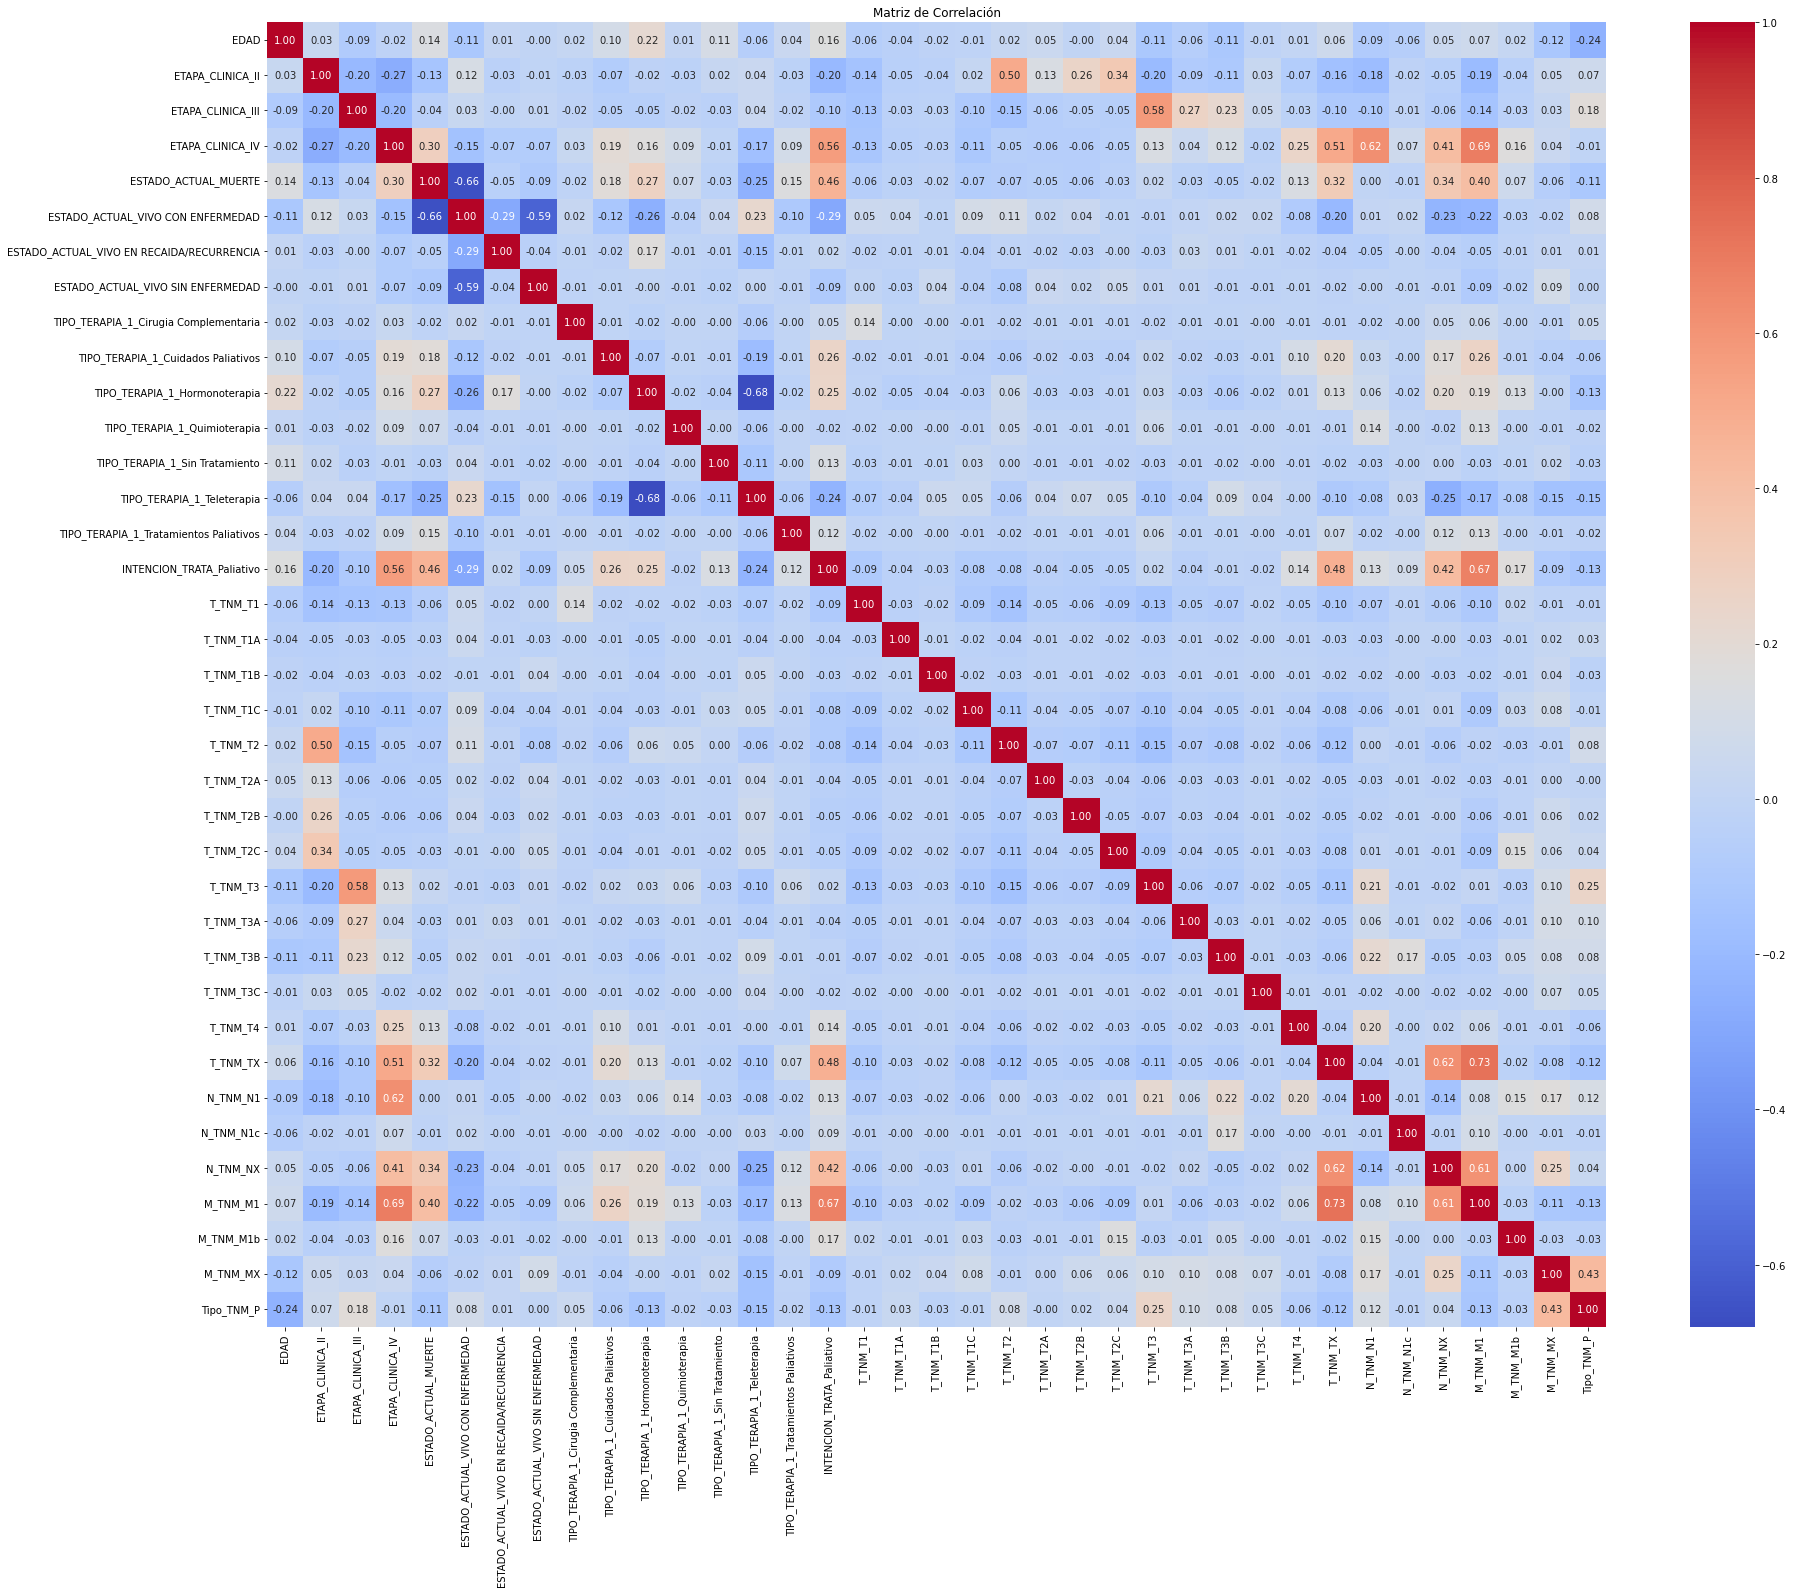

In [61]:


# Selección de columnas de interés
columnas_de_interes = ['EDAD', 'FECHA_INICIO_TRATAMIENTO_1','INTENCION_TRATA','ETAPA_CLINICA','ESTADO_ACTUAL','TIPO_TERAPIA_1','T_TNM', 'N_TNM', 'M_TNM', 'Tipo_TNM']
df_seleccionado = df[columnas_de_interes]

# Convertir la columna 'ETAPA_CLINICA' a valores numéricos utilizando One-Hot Encoding
df_encoded = pd.get_dummies(df_seleccionado, columns=['ETAPA_CLINICA','ESTADO_ACTUAL', 'TIPO_TERAPIA_1','INTENCION_TRATA','T_TNM', 'N_TNM', 'M_TNM', 'Tipo_TNM'], drop_first=True)

# Calculando la matriz de correlación
correlation_matrix = df_encoded.corr()

# Creamos un DataFrame de pandas con tu matriz de correlación
df_correlation = pd.DataFrame(correlation_matrix)

# Creamos un mapa de calor utilizando seaborn
plt.figure(figsize=(30, 24))
sns.heatmap(df_correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()
#

In [62]:
from tabulate import tabulate
import numpy as np

# Redondear los valores de la matriz de correlación a tres decimales
correlation_matrix_rounded = np.round(correlation_matrix, 3)

# Imprimir la matriz de correlación como una tabla con hasta 3 decimales
print("Matriz de correlación:")
print(tabulate(correlation_matrix_rounded, headers='keys', tablefmt='pretty'))


Matriz de correlación:
+-------------------------------------------+--------+------------------+-------------------+------------------+----------------------+-----------------------------------+-------------------------------------------+-----------------------------------+---------------------------------------+------------------------------------+-------------------------------+------------------------------+--------------------------------+----------------------------+----------------------------------------+---------------------------+----------+-----------+-----------+-----------+----------+-----------+-----------+-----------+----------+-----------+-----------+-----------+----------+----------+----------+-----------+----------+----------+-----------+----------+------------+
|                                           |  EDAD  | ETAPA_CLINICA_II | ETAPA_CLINICA_III | ETAPA_CLINICA_IV | ESTADO_ACTUAL_MUERTE | ESTADO_ACTUAL_VIVO CON ENFERMEDAD | ESTADO_ACTUAL_VIVO EN RECAIDA/RECURREN

In [65]:
# Obtener los valores absolutos de la matriz de correlación
correlation_abs = correlation_matrix.abs()

# Crear una lista de tuplas que contenga las correlaciones y sus pares de columnas correspondientes
correlation_list = [(column1, column2, correlation_abs.loc[column1, column2]) for column1 in correlation_abs.columns for column2 in correlation_abs.columns if column1 != column2]

# Ordenar la lista de correlaciones en orden descendente según el valor absoluto
correlation_list_sorted = sorted(correlation_list, key=lambda x: x[2], reverse=True)

from tabulate import tabulate

# Crear una lista de las correlaciones más altas redondeadas a 3 decimales
correlation_table = [(f"{column1} - {column2}", round(correlation, 3)) for column1, column2, correlation in correlation_list_sorted[:10]]

# Imprimir las correlaciones más altas en forma de tabla
print("Las correlaciones más altas:")
print(tabulate(correlation_table, headers=["Columnas", "Correlación"], tablefmt="pretty"))


Las correlaciones más altas:
+------------------------------------------------------------+-------------+
|                          Columnas                          | Correlación |
+------------------------------------------------------------+-------------+
|                    T_TNM_TX - M_TNM_M1                     |    0.73     |
|                    M_TNM_M1 - T_TNM_TX                     |    0.73     |
|                ETAPA_CLINICA_IV - M_TNM_M1                 |    0.689    |
|                M_TNM_M1 - ETAPA_CLINICA_IV                 |    0.689    |
| TIPO_TERAPIA_1_Hormonoterapia - TIPO_TERAPIA_1_Teleterapia |    0.68     |
| TIPO_TERAPIA_1_Teleterapia - TIPO_TERAPIA_1_Hormonoterapia |    0.68     |
|            INTENCION_TRATA_Paliativo - M_TNM_M1            |    0.673    |
|            M_TNM_M1 - INTENCION_TRATA_Paliativo            |    0.673    |
|  ESTADO_ACTUAL_MUERTE - ESTADO_ACTUAL_VIVO CON ENFERMEDAD  |    0.661    |
|  ESTADO_ACTUAL_VIVO CON ENFERMEDAD - ESTADO_A